+ Summary Step :
  - Load the data
  - Check if any NaN value/ duplicate data
  - Label Encoding ( from String to Number ) + export to the csv file + update the value to "data" varuable
  - Remove the column want to validate the logistic  regression ( attrition as example)
  - Create a training dataset + test dataset (use train_test_split from the library)
  - Logistic regression : Train data for getting the result -> use test for collecting the accuracy
  - Random Forest : Train data for getting the result -> use test for collecting the accuracy
  - Evaluate : find the important attribute impact to the result
  - LIME explainer , evaluate how the attribute impact the result
  - Linear regresstion
  - Pearson correlation coefficient
  - Correlation matrix


In [ ]:
!pip install -q unzip
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics
!pip install -e .
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1: Upload kaggle.json
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mnhthinguyn","key":"8e929ac7632d9908a476eb9c12e2d0e4"}'}

In [3]:
# Step 2: Move kaggle.json to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Step 3: Set permissions
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Install Kaggle package
!pip install kaggle


In [5]:
!mkdir -p /content/specific-folder
!kaggle datasets download -d vjchoudhary7/hr-analytics-case-study -p /content/hr-analysis

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study
License(s): unknown
 48% 5.00M/10.3M [00:00<00:00, 34.3MB/s]
100% 10.3M/10.3M [00:00<00:00, 62.8MB/s]


In [6]:
!unzip /content/hr-analysis/hr-analytics-case-study.zip -d /content/Hr_dataset

Archive:  /content/hr-analysis/hr-analytics-case-study.zip
  inflating: /content/Hr_dataset/data_dictionary.xlsx  
  inflating: /content/Hr_dataset/employee_survey_data.csv  
  inflating: /content/Hr_dataset/general_data.csv  
  inflating: /content/Hr_dataset/in_time.csv  
  inflating: /content/Hr_dataset/manager_survey_data.csv  
  inflating: /content/Hr_dataset/out_time.csv  


In [7]:
data=pd.read_csv("/content/Hr_dataset/general_data.csv")
data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [8]:
data=pd.read_csv("/content/Hr_dataset/employee_survey_data.csv")
data.head(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [9]:
data=pd.read_csv("/content/Hr_dataset/manager_survey_data.csv")
data.head(5)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [10]:
data=pd.read_csv("/content/Hr_dataset/in_time.csv")
data.head(5)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


# Label Encoder
Purpose: LabelEncoder is used to convert categorical labels (which are usually in string format) into numerical values that a machine learning model can process.

How It Works:

Each unique category or label in a dataset is assigned a unique integer.
For example, if you have a list of colors: ['red', 'green', 'blue', 'green'], the LabelEncoder will transform these into [0, 1, 2, 1] (or similar mapping depending on the order).
Usage: It is commonly used for encoding target labels in classification problems where the labels are non-numeric.



StandardScaler
Purpose: StandardScaler is used to standardize features by removing the mean and scaling to unit variance.

How It Works:

It transforms the data in such a way that the mean of each feature becomes 0 and the standard deviation becomes 1.
This is useful because many machine learning algorithms perform better or converge faster when the features are on a similar scale.


  
Usage: It's used for preprocessing data, especially when features have different scales, which can negatively affect the performance of algorithms that rely on distance calculations (e.g., K-Nearest Neighbors, SVMs).

In [12]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
ss=StandardScaler()

In [41]:
data=pd.read_csv("/content/Hr_dataset/general_data.csv")
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeID,0
Gender,0


is used to remove any missing or NaN (Not a Number) values from the dataset data. Here's a detailed explanation of what it does:
How It Works:

By default, dropna() removes any rows that contain at least one NaN value.
If a row contains one or more NaN values, that entire row will be dropped from the DataFrame.
Usage:

This method is often used during data cleaning to ensure that the dataset is free of missing values, which can cause issues during data analysis or when training machine learning models.
Important Points:

Default Behavior: dropna() drops rows by default. If you want to drop columns instead, you can specify axis=1.
Thresholds: You can also specify a threshold of non-NaN values required for the row/column to be kept using the thresh parameter.
In-Place: If you want to modify the DataFrame without creating a copy, you can use inplace=True (e.g., data.dropna(inplace=True)).
Example

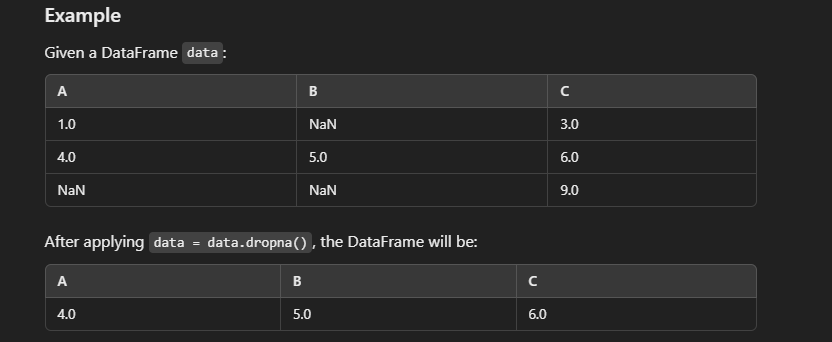

In [42]:
data=data.dropna()
data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [22]:
data.isnull().sum()#Recheck if any NaN data

,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeID,0
Gender,0


In [ ]:
data.duplicated().sum()

Label Encoding:

LabelEncoder transforms categorical data into numeric labels, which are easier for machine learning algorithms to process.

For each categorical column, the encoder assigns a unique integer to each category.

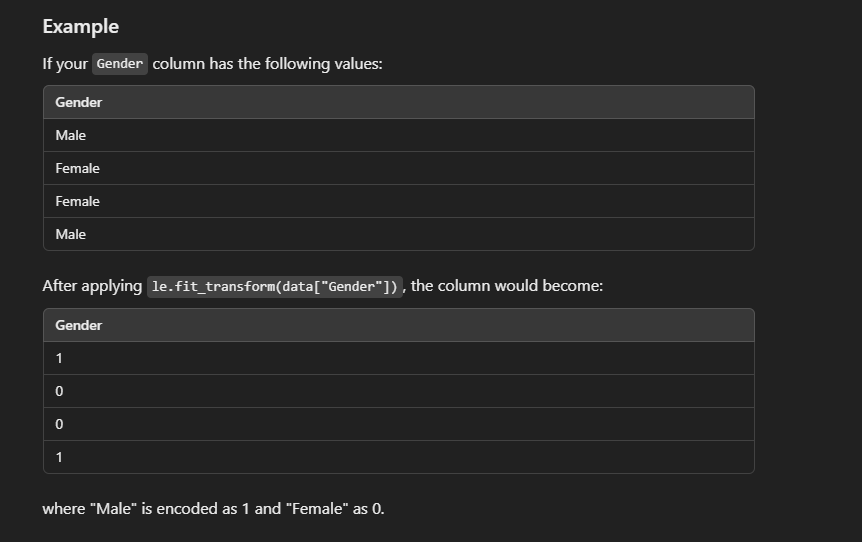

Label Encoding the whole column on dataset and export to the csv file for afterward tracking


Explanation
data.select_dtypes(include=['object', 'category']):

data: This is a DataFrame created by reading your CSV file.

select_dtypes(): This is a method used to select columns of specific data types from the DataFrame.

include=['object', 'category']: This parameter specifies that you want to include columns whose data type is either 'object' or 'category'.

'object': In pandas, columns with the data type 'object' are typically used for text data (i.e., string data). These columns are often treated as categorical features in many analyses.
'category': Columns with the data type 'category' are explicitly defined as categorical data. Pandas allows for categorical data types that are optimized for memory usage and performance.
.columns:

This attribute retrieves the names of the columns in the DataFrame after selecting the desired data types.
.tolist():

Converts the column names from an Index object (which is a pandas data structure) to a standard Python list. This makes it easier to work with the list of column names in subsequent code.

In [138]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset from the CSV file

data= pd.read_csv("/content/Hr_dataset/general_data.csv")
data = data.drop(["EmployeeID"], axis=1)
data = data.drop(["Over18"], axis=1)


# Initialize the LabelEncoder
le = LabelEncoder()

# Automatically identify categorical columns
# Assuming categorical columns are of type 'object' or 'category'
# categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns = data.columns.tolist()
print(categorical_columns)

# Create an empty dictionary to store mappings
all_mappings = {}

# Loop through each categorical column to encode and get the label mappings
for column in categorical_columns:
    # Fit and transform the column
    data[column] = le.fit_transform(data[column])

    # Get the mapping of numbers to original values
    class_mapping = dict(enumerate(le.classes_))

    # Store the mapping in the dictionary
    all_mappings[column] = class_mapping

# Convert the mappings to a DataFrame
mappings_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in all_mappings.items()]))

# Export the DataFrame to a CSV file
csv_file_path = "/content/label_mappings.csv"
mappings_df.to_csv(csv_file_path, index=False)

print(f"Label mappings have been exported to {csv_file_path}")


['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Label mappings have been exported to /content/label_mappings.csv


In [ ]:
data.head(50)

In [139]:
#check data type of "data" variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      4410 non-null   int64
 1   Attrition                4410 non-null   int64
 2   BusinessTravel           4410 non-null   int64
 3   Department               4410 non-null   int64
 4   DistanceFromHome         4410 non-null   int64
 5   Education                4410 non-null   int64
 6   EducationField           4410 non-null   int64
 7   EmployeeCount            4410 non-null   int64
 8   Gender                   4410 non-null   int64
 9   JobLevel                 4410 non-null   int64
 10  JobRole                  4410 non-null   int64
 11  MaritalStatus            4410 non-null   int64
 12  MonthlyIncome            4410 non-null   int64
 13  NumCompaniesWorked       4410 non-null   int64
 14  PercentSalaryHike        4410 non-null   int64
 15  Stan

x: Contains all columns from the original DataFrame except the "Attrition" column. These are the features used to predict the target variable.

y: Contains the "Attrition" column, which is the target variable you want to predict.

x = ss.fit_transform(x): Standardizes the feature columns (i.e., scales them to have zero mean and unit variance).

In [140]:
x=data.drop(["Attrition"],axis=1)
y=data["Attrition"]
x=ss.fit_transform(x)

train_test_split(x, y, test_size=0.2, random_state=42):
x: The features of your dataset, which you want to split into training and testing sets.

y: The target variable or labels corresponding to the features.
test_size=0.2: This specifies the proportion of the dataset to include in the test split. In this case, 0.2 means that 20% of the data will be used for testing, and the remaining 80% will be used for training.

random_state=42: This is a seed value for the random number generator used by train_test_split. Setting a specific seed ensures that you get the same split every time you run the code, which is useful for reproducibility.

Logistic Regression

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [143]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1000,max_iter=10000)

In [144]:
lr.fit(x_train,y_train)

LogisticRegression(C=1000, max_iter=10000)

In [145]:
y_pred=lr.predict(x_test)

In [146]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy by Logistic Regression : ",acc)

Accuracy by Logistic Regression :  0.8367346938775511


Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
print("Accuracy by Random Forest Classifier : ",rfc.score(x_test,y_test))

Accuracy by Random Forest Classifier :  0.9920634920634921


In [ ]:

!pip install interpret
!pip install scikit-learn
!pip install matplotlib
!pip install utils


In [ ]:
!pip install lime


['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
                    Feature  Importance
11            MonthlyIncome    0.102291
0                       Age    0.099134
16        TotalWorkingYears    0.093244
3          DistanceFromHome    0.067149
13        PercentSalaryHike    0.064964
18           YearsAtCompany    0.063376
12       NumCompaniesWorked    0.055110
9                   JobRole    0.053990
20     YearsWithCurrManager    0.053050
17    TrainingTimesLastYear    0.046329
10            MaritalStatus    0.041546
19  YearsSinceLastPromotion    0.041390
5            EducationField    0.040326
4                 Education    0.039583
15         StockOptionLevel   

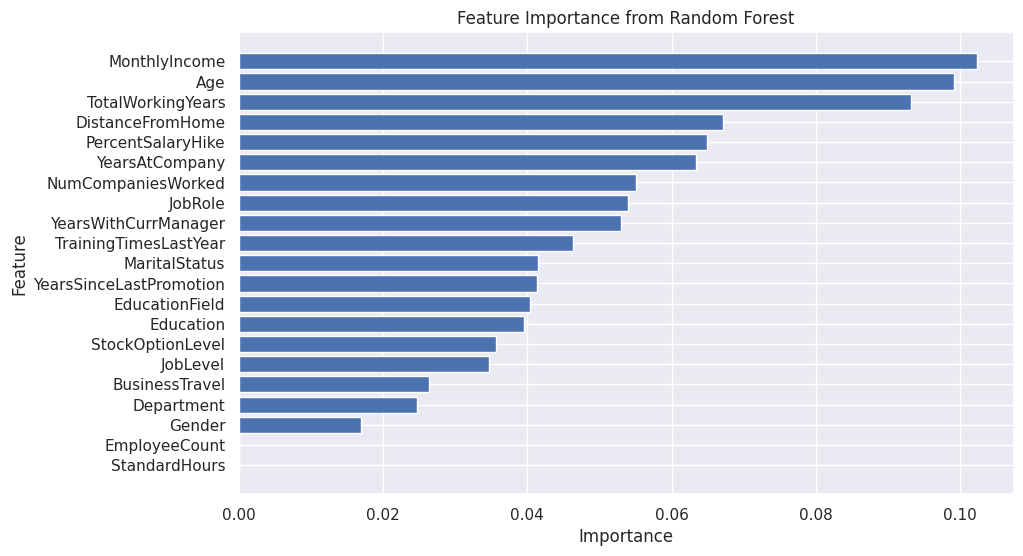

In [149]:
from interpret.blackbox import LimeTabular
from interpret import show
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd
import numpy as np

feature_importances = rfc.feature_importances_
x1= data.drop(["Attrition"],axis=1)

categorical_columns = x1.columns.tolist()
print(categorical_columns)
# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': categorical_columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance scores
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the relationship between MonthlyIncome and Attrition using a box plot
plt.figure(figsize=(10, 6))

# Use Seaborn for a clear visualization
sns.boxplot(x='Attrition', y='DistanceFromHome', data=data)

# Add titles and labels
plt.title('Relationship between DistanceFromHome and Attrition')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('DistanceFromHome')

# Show the plot
plt.show()


In [150]:
from interpret.blackbox import LimeTabular
from interpret import show

# Initialize the LIME explainer
lime = LimeTabular(model=rfc, data=data, feature_names=categorical_columns, mode='classification')

# Select an instance to explain (e.g., the first instance in the test set)
explanation = lime.explain_local(x_test[30:60], y_test[30:60])  # Explain a batch (or use .reshape if needed)

# Display the explanation
show(explanation)

Linear Regression

In [98]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset from the CSV file
data = pd.read_csv('/content/Hr_dataset/general_data.csv')

# Initialize the LabelEncoder
le = LabelEncoder()

# Automatically identify categorical columns
# Assuming categorical columns are of type 'object' or 'category'
# categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns = data.columns.tolist()
print(categorical_columns)

# Create an empty dictionary to store mappings
all_mappings = {}

# Loop through each categorical column to encode and get the label mappings
for column in categorical_columns:
    # Fit and transform the column
    data[column] = le.fit_transform(data[column])

    # Get the mapping of numbers to original values
    class_mapping = dict(enumerate(le.classes_))

    # Store the mapping in the dictionary
    all_mappings[column] = class_mapping

# Convert the mappings to a DataFrame
mappings_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in all_mappings.items()]))

# Export the DataFrame to a CSV file
csv_file_path = "/content/label_mappings.csv"
mappings_df.to_csv(csv_file_path, index=False)

print(f"Label mappings have been exported to {csv_file_path}")


['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Label mappings have been exported to /content/label_mappings.csv


Mean Squared Error: 150968.1432603634
R-squared: -0.0053287005108275665


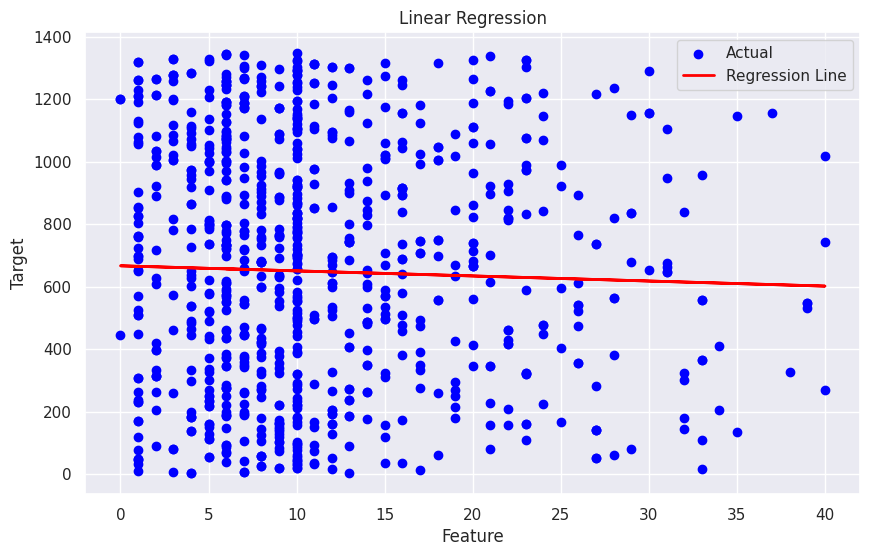

In [103]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Load the data from the CSV file
# Replace '/path/to/your/dataset.csv' with your actual file path


# Step 3: Preprocess the data
# Example: Assume the dataset has columns 'Feature' and 'Target'
# Replace these with your actual column names

# Drop any rows with missing values (optional)
data = data.dropna()

# Define features (X) and target (y)
X = data["TotalWorkingYears"]  # Replace 'Feature' with your actual feature column name(s)
y = data['MonthlyIncome']     # Replace 'Target' with your actual target column name

# If you have multiple features, ensure X has multiple columns

# Step 4: Split the data into training and testing sets

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape if X is a single feature to ensure it's 2D
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Step 5: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 7: Visualize the results (for single feature regression)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()


Using Pearson Correlation for Numerical Data

If both attributes are numerical, you can use the Pearson correlation coefficient, which ranges from -1 to 1:

1 indicates a perfect positive correlation.
-1 indicates a perfect negative correlation.
0 indicates no correlation.
Here's how you can calculate it using Pandas:

In [114]:
import pandas as pd


# Calculate the Pearson correlation coefficient between two columns, e.g., 'MonthlyIncome' and 'Attrition'
correlation = data['TrainingTimesLastYear'].corr(data['Attrition'])

print(f"Pearson correlation between TrainingTimesLastYear and Attrition: {correlation}")


Pearson correlation between TrainingTimesLastYear and Attrition: -0.04943057624425461


Pearson Correlation Coefficient: This coefficient measures the linear relationship between two numerical variables. It ranges from -1 to 1:

A value of 1 indicates a perfect positive linear relationship (as one variable increases, the other increases).

A value of -1 indicates a perfect negative linear relationship (as one variable increases, the other decreases).
A value of 0 indicates no linear relationship.

Using Correlation Matrix
To evaluate the correlation between multiple attributes at once, you can create a correlation matrix:

In [115]:
# Correlation matrix for all numerical features
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)

# If you are interested in a specific pair
print(correlation_matrix.loc['MonthlyIncome', 'Attrition'])


                              Age  Attrition  BusinessTravel  Department  \
Age                      1.000000  -0.159205        0.024751   -0.010846   
Attrition               -0.159205   1.000000        0.000074   -0.048206   
BusinessTravel           0.024751   0.000074        1.000000   -0.010982   
Department              -0.010846  -0.048206       -0.010982    1.000000   
DistanceFromHome         0.006963  -0.009730        0.024616    0.012134   
Education               -0.035706  -0.015111        0.002755   -0.004597   
EducationField           0.043194  -0.057940       -0.015462    0.013720   
EmployeeCount                 NaN        NaN             NaN         NaN   
EmployeeID               0.008649  -0.004729       -0.002590   -0.003455   
Gender                  -0.039352   0.018125       -0.039243    0.003158   
JobLevel                -0.002884  -0.010290        0.046111    0.002923   
JobRole                  0.011422   0.025809       -0.027194   -0.025466   
MaritalStatu

Visualizing Correlation
You can also visualize the correlation between attributes using a heatmap with Seaborn:

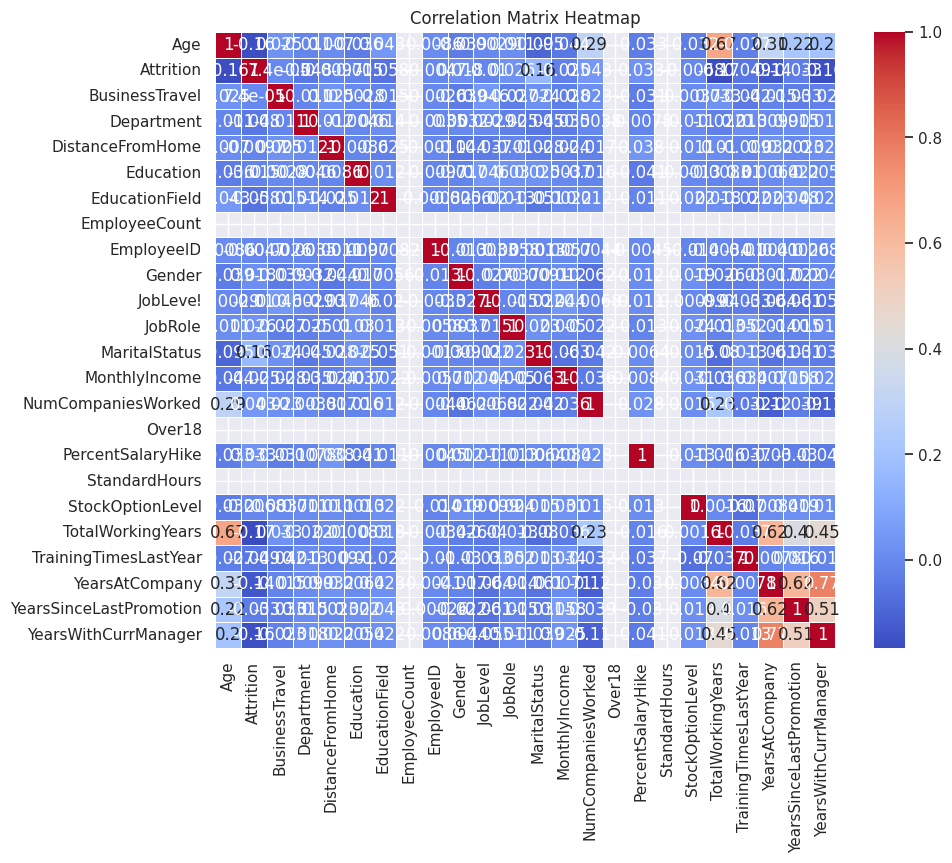

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
correlation_matrix = data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


Re-attempt to label the dataset


In [120]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset from the CSV file
data = pd.read_csv('/content/Hr_dataset/general_data.csv')

# Initialize the LabelEncoder
le = LabelEncoder()

# Identify categorical columns and ID column
id_column = 'ID'  # Adjust if your ID column has a different name
categorical_columns = [col for col in data.columns if col != id_column]

# Print the columns to be encoded
print("Columns to encode:", categorical_columns)

# Create an empty dictionary to store mappings
all_mappings = {}

# Encode each categorical column and get the label mappings
for column in categorical_columns:
    # Fit and transform the column
    data[column] = le.fit_transform(data[column])

    # Get the mapping of numbers to original values
    class_mapping = dict(enumerate(le.classes_))

    # Store the mapping in the dictionary
    all_mappings[column] = class_mapping

# Encode the ID column if necessary (optional)
if id_column in data.columns:
    # Assuming IDs are numeric and don't need encoding
    # If IDs are not numeric, encode them similarly to other categorical columns
    data[id_column] = data[id_column].astype(str)
    le_id = LabelEncoder()
    data[id_column] = le_id.fit_transform(data[id_column])

    # Get the mapping of numbers to original ID values
    id_mapping = dict(enumerate(le_id.classes_))
    all_mappings[id_column] = id_mapping

# Convert the mappings to a DataFrame
mappings_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in all_mappings.items()]))

# Export the DataFrame to a CSV file
csv_file_path = "/content/label_mappings.csv"
mappings_df.to_csv(csv_file_path, index=False)

print(f"Label mappings have been exported to {csv_file_path}")


Columns to encode: ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Label mappings have been exported to /content/label_mappings.csv


In [119]:
data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,33,0,2,2,5,1,1,0,0,0,...,1,0,0,0,0,1,6,1,0,0
1,13,1,1,1,9,0,1,0,1,0,...,0,0,12,0,1,6,3,5,1,4
2,14,0,1,1,16,3,4,0,2,1,...,1,0,4,0,3,5,2,5,0,3
3,20,0,0,1,1,4,1,0,3,1,...,3,0,0,0,3,13,5,8,7,5
4,14,0,2,1,9,0,3,0,4,1,...,4,0,1,0,2,9,2,6,0,4
